This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [1]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [2]:
folder = 'Gel_studies'
bucket = 'dtoghani.data'
#experiment = 'test' #Used for naming purposes. Should exclude XY and well information

#vids = 2
to_track = []
frames = 651
fps = 100.02
umppx = 0.07

vids = 10
mws = ['10k_PEG', '5k_PEG', '1k_PEG', '5k_PEG_NH2', 'PS_NH2', 'PS_COOH']
calcs = [2]
for calc in calcs:
    for mw in mws:
        for num in range(1, vids+1):
            #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
            to_track.append('{}_{}mM_XY{}'.format(mw, calc, '%02d' % num))

In [ ]:
to_track

In [3]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
    #                                                         remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with 10k_PEG_2mM_XY01
Done with 10k_PEG_2mM_XY02
Done with 10k_PEG_2mM_XY03
Done with 10k_PEG_2mM_XY04
Done with 10k_PEG_2mM_XY05
Done with 10k_PEG_2mM_XY06
Done with 10k_PEG_2mM_XY07
Done with 10k_PEG_2mM_XY08
Done with 10k_PEG_2mM_XY09
Done with 10k_PEG_2mM_XY10
Done with 5k_PEG_2mM_XY01
Done with 5k_PEG_2mM_XY02
Done with 5k_PEG_2mM_XY03
Done with 5k_PEG_2mM_XY04
Done with 5k_PEG_2mM_XY05
Done with 5k_PEG_2mM_XY06
Done with 5k_PEG_2mM_XY07
Done with 5k_PEG_2mM_XY08
Done with 5k_PEG_2mM_XY09
Done with 5k_PEG_2mM_XY10
Done with 1k_PEG_2mM_XY01
Done with 1k_PEG_2mM_XY02
Done with 1k_PEG_2mM_XY03
Done with 1k_PEG_2mM_XY04
Done with 1k_PEG_2mM_XY05
Done with 1k_PEG_2mM_XY06
Done with 1k_PEG_2mM_XY07
Done with 1k_PEG_2mM_XY08
Done with 1k_PEG_2mM_XY09
Done with 1k_PEG_2mM_XY10
Done with 5k_PEG_NH2_2mM_XY01
Done with 5k_PEG_NH2_2mM_XY02
Done with 5k_PEG_NH2_2mM_XY03
Done with 5k_PEG_NH2_2mM_XY04
Done with 5k_PEG_NH2_2mM_XY05
Done with 5k_PEG_NH2_2mM_XY06
Done with 5k_PEG_NH2_2mM_XY07


In [5]:
for mw in mws:
    to_avg = []
    for sample in to_track:
        if mw in sample:
            to_avg.append(sample)
    
    weights, wh1 = msd.precision_weight(to_avg, gSEM)
    geodata = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                      bucket=bucket, folder=folder, experiment='2mM_{}'.format(mw))

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:609: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:656: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:660: RuntimeWarning: divide by zero encountered in true_divide
  gstder_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample]


Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

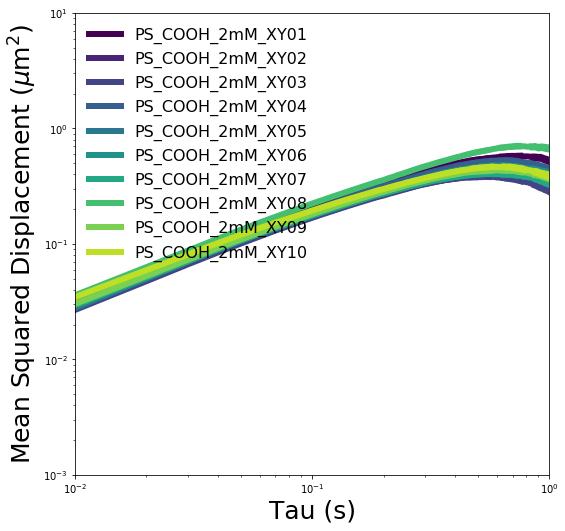

In [12]:
msd.plot_all_experiments(to_track[50:60], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

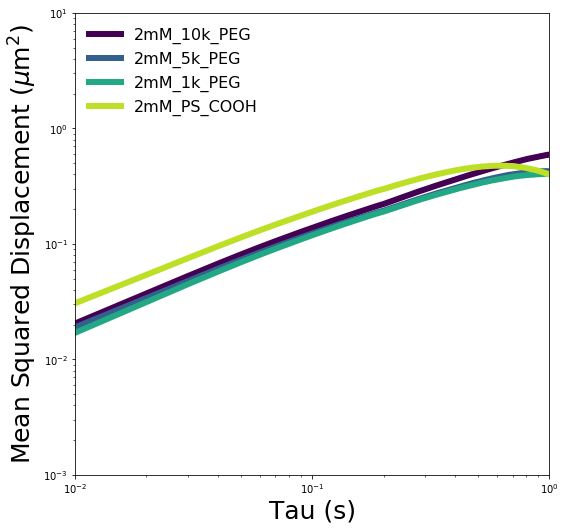

In [13]:
msd.plot_all_experiments(['2mM_10k_PEG', '2mM_5k_PEG', '2mM_1k_PEG', '2mM_PS_COOH'],
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

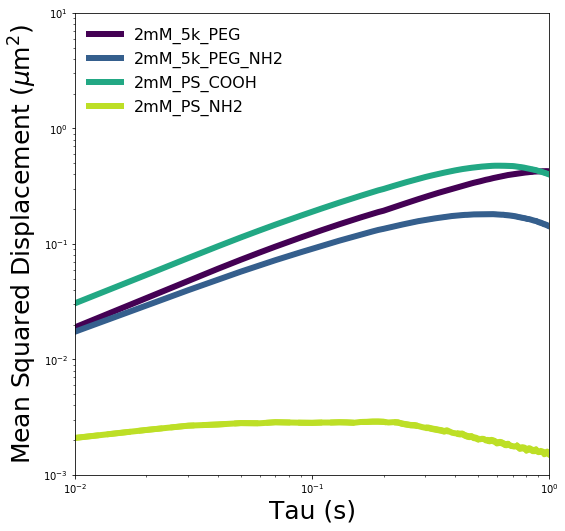

In [14]:
msd.plot_all_experiments(['2mM_5k_PEG', '2mM_5k_PEG_NH2', '2mM_PS_COOH', '2mM_PS_NH2'],
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder)